# Final project:

## Hand in instructions:

This project is meant to be done by groups. Needless to say, everyone is expected to collaborate and try to create synergies among the different parts of the mini-project.

Original answers are expected.

You will need to upload a pdf with your final report to google class by the due date. Please, only one memeber of the group uploads the pdf and all the members' names are clearly indicated.

Additionaly, upload the project to your github with all the steps we saw in class. 


## Requirements:

We want to understand and model disease spread focusing on the COVID epidemic. We will first make ose of the COVID19_state.csv dataset to explore the real world data and then simulate a simple contagion model. All the questions below should be hand in in a report-like fashion (remember, this aims to be a project not a problem set). Include all the necesary figures and explanations to make the report explanatory.

This project simulates an hypothetical policy analysis so we, the policy makers, are interested on the following :

- How has been the evolution on the number of cases over time?
- Do tests seem to have some effect?
- What are the subgroups that suffered most?
- If we were to do confinement measures by subgroups of populations, on which groups should we focus to stop the contagion early? 


## Model:

In order to study beforehand the evolution of pandemics, epidemiodiologist model contagion mathematically. We will now simulate with python a simple model of contagion.

- There is a total population of 1000 people. Each one can infect 3 other individuals per day with a probability of 0.05 (let's assume that they are totally independent). There are 10 persons initially infected. 

Simulate and plot the number of infected persons in the next 3 days.

- How many days will it take for the full population to be infected?
- Let's simulate a policy. Suposse we introduce vaccination at period 3. The implications of the vaccine are only for those that are still uninfected. For simplicity, their inmunity is modeled as a reduction in the probability that they get infected of 0.01 pp. How many infections result in the 10th day? 



In [18]:
# import packages
import random
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# set seed
random.seed(4)

In [19]:
def plot_pandemic(y, vac_launch):
    """ plots the evolution of a pandemic.

    Args:
    y (list): number of cases per day used as y values
    vac_launch (int): day vaccine was introduced (0 if no vaccine introduced)

    Returns:
    NoneType: displays plot 

    """

    # x values are day numbers starting at 1
    x = list(range(1,len(y)+1))

    # determine step size (used for x ticks)
    if len(x) < 20: 
        step = 1.0
    else:
        step = 5

    # if vaccine, add line on plot for vaccine day
    if vac_launch > 0: 
        plt.vlines(x = vac_launch, ymin = min(y), ymax = max(y), colors = 'black')

    # plot graph
    plt.plot(x,y)
    plt.xticks(np.arange(min(x), max(x)+1, step))
    plt.xlabel('Days')
    plt.ylabel('Number of Infected People')
    plt.title('Evolution of Pandemic')
    plt.show()
    

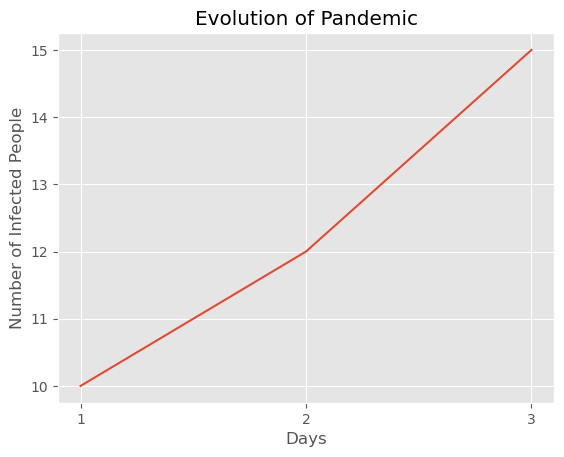

In [16]:
##### 3 DAY PANDEMIC #####

# set variables
max_infect = 3
proba = 0.05
infected = 10
evolution = []

# running pandemic for 3 days
for day in range(3): 
    
    # each person person infected can infect up to (max_infect) more people
    # keep track of infected people 
    for i in range(infected): 
        infected += sum(random.choices([1,0], weights = [proba, 1-proba], k = max_infect))
    
    # add total number of infected people up to that day to evolution list
    evolution.append(infected)

# plotting evolution during 3 day pandemic
plot_pandemic(evolution, 0)


whole population infected in 34 days


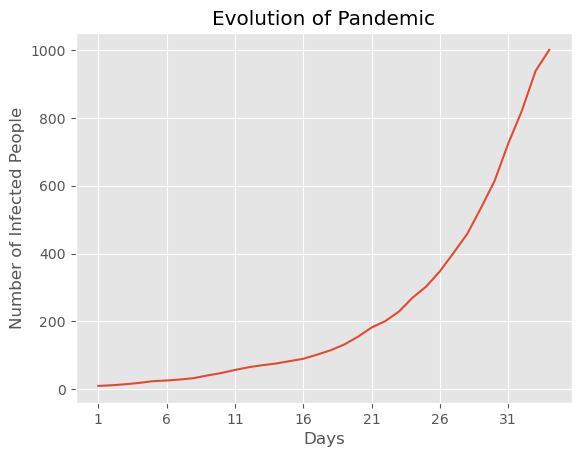

In [20]:
##### INFECT WHOLE POPULATION #####

# set variables
max_infect = 3
proba = 0.05
infected = 10
evolution = []
pop = 1000

# run loop until at least 1000 people are infected
while infected < pop:

    # each person person infected can infect up to (max_infect) more people
    # keep track of infected people 
    for i in range(infected): 
        infected += sum(random.choices([1,0], weights = [proba, 1-proba], k = max_infect))
    
    # add total number of infected people up to that day to evolution list
    evolution.append(infected)

# last value of the list has to be 1000 (because population size)
evolution[-1] = 1000
print(f"whole population infected in {len(evolution)} days")

plot_pandemic(evolution,0)

30 infections by day 10


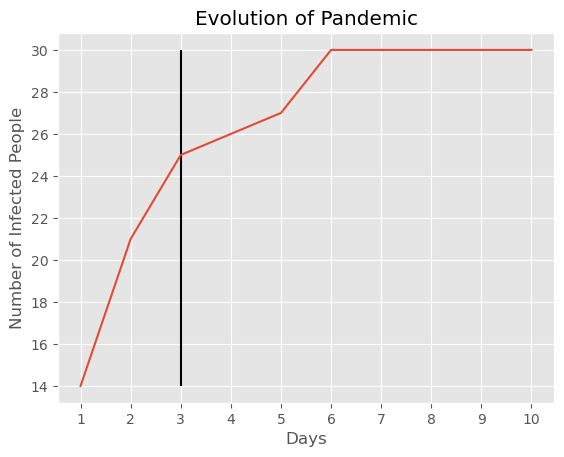

: 

In [21]:
##### POLICY IMPLEMENTATION: VACCINE #####

# set variables
max_infect = 3
proba = 0.05
infected = 10
evolution = []
vaccine_launch = 3

# run 10 days
days = 10

for day in range(days):

    # determine infection probability based on day 
    if day <vaccine_launch: # before vaccine
        proba = 0.05
    else: # after vaccine
        proba -= 0.01 
    
    # each person person infected can infect up to (max_infect) more people
    # keep track of infected people 
    for i in range(infected): 
        infected += sum(random.choices([1,0], weights = [proba, 1-proba], k = max_infect))
    
    # add total number of infected people up to that day to evolution list
    evolution.append(infected)

print(evolution[-1], "infections by day", days)
plot_pandemic(evolution,vaccine_launch)
